<a href="https://www.kaggle.com/code/avinashrola/sentiment-analysis-of-imdb-movie-reviews?scriptVersionId=107809646" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset/IMDB Dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk # To work with NLP
from sklearn.feature_extraction.text import CountVectorizer # transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text
from sklearn.feature_extraction.text import TfidfVectorizer # Only counts the most occurrences words in line
from sklearn.preprocessing import LabelBinarizer # Converts labels into binary values
from nltk.corpus import stopwords # To remove stopwords from data
from nltk.stem.porter import PorterStemmer # ex.: love, loving, loved -> love 
from wordcloud import WordCloud,STOPWORDS 
from nltk.stem import WordNetLemmatizer # same as porterstemmer
from nltk.tokenize import word_tokenize,sent_tokenize # word_tokenize -> to split a sentence into tokens or words, sent_tokenize -> split a document or paragraph into sentences
from bs4 import BeautifulSoup # For web scrapping
import spacy # library for advanced Natural Language Processing
import re,string,unicodedata # unicodedata -> provides access to the Unicode Character Database
from nltk.stem import LancasterStemmer # same as porterstemmer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from nltk.tokenize.toktok import ToktokTokenizer
from textblob import TextBlob # processing textual data
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('/kaggle/input/imdb-dataset/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
    data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

**Text Normalization**

In [6]:
#Tokenization of text
tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [7]:
data.iloc[1]

review       A wonderful little production. <br /><br />The...
sentiment                                             positive
Name: 1, dtype: object

**Remove HTML strips and noise text**

In [8]:
# Remove HTML strips

def strip_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

In [9]:
# Remove square brackets

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)  # returns a string with replaced values


In [10]:
#Removing the noisy text

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
data['review']=data['review'].apply(denoise_text)

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:439: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


**Removing Special Character**

In [11]:
def remove_special_characters(text, remove_digits=True):
    text = re.sub('[^a-zA-z0-9\s]','', text)
    return text

#Apply function on review column
data['review']=data['review'].apply(remove_special_characters)

**Text Stemming**

In [12]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

#Apply function on review column
data['review']=data['review'].apply(simple_stemmer)

**Removing Stopwords**

In [13]:
# Set stopword to english

stop = set(stopwords.words('english'))
print(stop)


# Removing the stopwords

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

{'why', "isn't", 'too', 'myself', 'its', "should've", 'my', 'are', "hadn't", 'while', 'hasn', 'is', 'having', 're', 'needn', 'wasn', "haven't", 'as', 'no', "couldn't", 'haven', "it's", 'below', "won't", 'they', 'the', 'where', 'll', 'them', 'do', 'through', 'doing', 'off', 'she', 'our', 'there', 'aren', 'and', 'of', 'only', "needn't", 'shan', "wasn't", 'how', 'his', "mustn't", 'into', 'down', 'yours', "shouldn't", 'an', 'we', 'up', 'nor', 'again', 'a', 'was', 'their', 'whom', 'itself', "you're", "weren't", "you'd", 'above', 'in', 'after', 'some', 'so', 'doesn', 'for', 'weren', 'he', 'this', 'should', 'when', 'just', 'out', 'i', 'will', 'your', 'ma', "wouldn't", 'but', 'both', 's', 'further', 'now', 'between', 'most', "hasn't", 'himself', 'has', "doesn't", 'which', 'until', 'under', 'ours', 'not', 'once', 't', 'wouldn', 'were', 'all', 'be', 'him', 'am', 'any', "you'll", 'by', 'm', 'few', 'than', 'mightn', 'about', 'what', 'have', 'themselves', 'can', 've', 'couldn', 'then', 'at', 'it', 

**Labeling the sentiment text**

In [14]:
#labeling the sentient data

lb=LabelBinarizer()


#transformed sentiment data

data['sentiment'] = lb.fit_transform(data['sentiment'])
print(data['sentiment'].shape)

(50000,)


In [15]:
x = data['review']
y = data['sentiment']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=50)

In [17]:
print(y_train)

26651    1
29825    0
3201     0
32060    1
16804    0
        ..
48417    1
22637    1
42891    1
38368    0
14000    1
Name: sentiment, Length: 35000, dtype: int64


In [18]:
print(y_test)

20515    1
42486    0
31440    0
41116    0
48739    1
        ..
43087    1
554      0
10639    0
9259     0
48434    0
Name: sentiment, Length: 15000, dtype: int64


In [19]:
print('x_train : ',x_train.shape)
print('x_test : ',x_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

x_train :  (35000,)
x_test :  (15000,)
y_train :  (35000,)
y_test :  (15000,)


In [20]:
x_train[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [21]:
x_test[20515]

'didnt know expect thi alway consid bam margera cki crew team knuckl head devot stupid thing entertain didnt know could act everyon act thi movi pull good perform hilar aaaaagh scene mix ryan dunn depress hi reveng hi exgirlfriend perfectli time movi scene seem pointless time theyr funni recommend thi anyon like good laugh thi film may appeal prefer detail stori line seri twist turn'

**Bags of words model**

It is used to convert text documents to numerical vectors or bag of words.

In [22]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)

#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)


BOW_cv_train: (35000, 5531112)
BOW_cv_test: (15000, 5531112)


In [23]:
#Tfidf vectorizer

tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))


#transformed train reviews
x_train=tv.fit_transform(x_train)

#transformed test reviews
x_test=tv.transform(x_test)
print('Tfidf_train:',x_train.shape)
print('Tfidf_test:',x_test.shape)

Tfidf_train: (35000, 5531112)
Tfidf_test: (15000, 5531112)


**Modelling the dataset**

Logistic Regression

In [24]:
#training the model

lr=LogisticRegression()

train = lr.fit(x_train,y_train)
test = lr.fit(x_test,y_test)

In [25]:
#Predicting the model 

y_pred=lr.predict(x_test)

**Accuracy of the model**

In [26]:
lr_score=accuracy_score(y_test,y_pred)
print("lr_score :",lr_score)

lr_score : 0.9993333333333333


**Print the classification report**

In [27]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7571
           1       1.00      1.00      1.00      7429

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



**SGDClassifier**

In [28]:
#training the linear svm

svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)


#fitting the svm for bag of words

svm_train=svm.fit(x_train,y_train)

In [29]:
# Predicting the model 

svm_y_pred=svm.predict(x_test)


**Accuracy of the model**

In [30]:
svm_score=accuracy_score(y_test,svm_y_pred)
print("svm_score :",svm_score)

svm_score : 0.4952666666666667


**Naive Bayes**

In [31]:
#training the model

mnb=MultinomialNB()

mnb=mnb.fit(x_train,y_train)
print(mnb)

MultinomialNB()


In [32]:
# Predicting the model 

mnb_y_pred=mnb.predict(x_test)


**Accuracy of the model**

In [33]:
mnb_score=accuracy_score(y_test,mnb_y_pred)
print("mnb_score :",mnb_score)

mnb_score : 0.7368


**Let's see positive and negative words by using WordCloud.**

<function matplotlib.pyplot.show(close=None, block=None)>

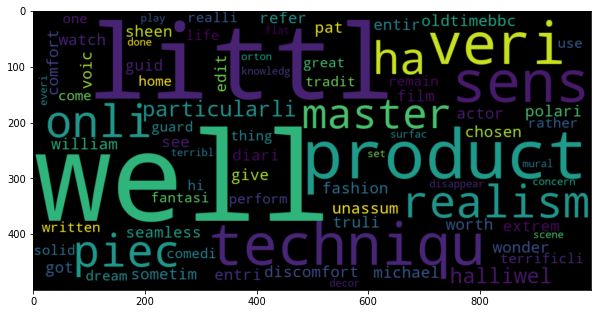

In [34]:
#word cloud for positive review words

plt.figure(figsize=(10,10))
positive_text=data['review'][1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

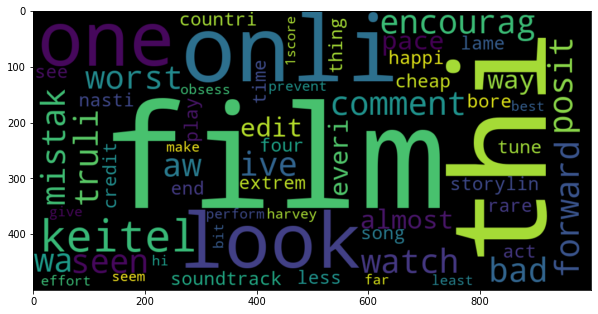

In [35]:
#word cloud for negative review words

plt.figure(figsize=(10,10))
negative_text=data['review'][8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show